# SVM

## Model: 
$$ y=sign(w\cdot x+b) $$

## Strategy: Margin maximization

$$ 
{w,b}=arg\min_{w,b} \ \frac {1}{2}||w||^2\\
s.t \ \ y_i (w\cdot x_i +b)\geq 1
$$

## Algorithm: Lagrange duality


构造拉格朗日函数

$$
L(w,b,a)=\frac {1}{2}||w||^2+\sum_{i=1}^N{a_i[1-y_i (w\cdot x_i +b)]}\quad a_i>0\\
$$



根据拉格朗日对偶性，将最小最大问题转化为最大最小问题

$$
\max_{a\geq0}L(w,b,a)=
\begin{cases}
\frac {1}{2}||w||^2 & \text{$w,b$ 满足约束}\\
+\infty &\text{$w,b$ 不满足约束}
\end{cases}
$$


$$
{w,b}=arg\min_{w,b}\max_{a\geq0}L(w,b,a)=arg\max_{a\geq0}\min_{w,b}L(w,b,a)
$$



$L(w,b,a)$分别对${w,b}$求导

$$
\nabla_w {L(w,b,a)}=w-\sum_{i=0}^N{a_iy_ix_i}=0\\
\nabla_b {L(w,b,a)}=-\sum_{i=0}^N{a_iy_i}=0
$$

得
$$
w=\sum_{i=0}^N{a_iy_ix_i}\\
\sum_{i=0}^N{a_iy_i}=0
$$

待回$L(w,b,a)$，得
$$
\min_{w,b} {L(w,b,a)}=-\frac 12 \sum_{i=0}^N \sum_{j=0}^N a_i a_j y_i y_j( x_i\cdot x_j )+\sum_{i=0}^N a_i
$$

即得原问题的对偶问题
$$
\min_{a}\quad \frac 12 \sum_{i=0}^N \sum_{j=0}^N a_i a_j y_i y_j( x_i\cdot x_j )-\sum_{i=0}^N a_i\\
s.t.\quad \sum_{i=0}^N{a_iy_i}=0\\
a_i\geq0,\quad i=1,2,...,N
$$

必有两个以上$a_j>0$，即支持向量，原问题最优解如下
$$
w^*=\sum_{i=0}^N{a_i^*y_ix_i}\\
b^*=y_j-\sum_{i=0}^N{a_i^*y_i(x_i\cdot x_j)}
$$


In [1]:
import numpy as np
from sklearn.datasets import load_iris

In [2]:
# 数据集
from random import shuffle
iris = load_iris()
X = iris.data[0:100]
Y = iris.target[0:100]
Y = Y*2-1  # 原数据的标签是0，1，这里处理成 -1，1
order = [i for i in range(0, 100)]
shuffle(order)
X, Y = X[order], Y[order]  # 乱序
N = 50
x, y = X[:N], Y[:N]  # 前N个作为训练集
y = y.reshape(N, 1)

In [3]:
from scipy.optimize import minimize  # 导入最小化算法


def fun(a):   # 目标函数
    temp = (a.reshape(N, 1)*y)*x  # N*n
    return 0.5*(np.dot(temp, temp.T)).sum()-a.sum()


# 约束
cons = [{'type': 'eq', 'fun': lambda a: (
    a.reshape(N, 1)*y).sum()}]  # sum(aiyi)==0
cons += [{'type': 'ineq', 'fun': lambda a, i=i: a[i]}
         for i in range(N)]  # ai>=0
# i=i 不可缺少

a0 = np.ones(y.shape)  # 设置初始值
res = minimize(fun, a0, method='SLSQP', constraints=cons)
print('最小值：', res.fun)
print('最优解：\n', res.x)
print('迭代终止是否成功：', res.success)
print('迭代终止原因：', res.message)

最小值： -0.5655472972002299
最优解：
 [ 3.71530602e-16  3.50021636e-17 -7.43230345e-16 -6.80095695e-16
 -3.31067338e-16  8.30167007e-16  4.71591796e-16 -2.00435784e-16
 -2.09110017e-16  7.23894398e-16  4.69093350e-16 -5.94126297e-16
  3.85685395e-16 -9.93510959e-17 -6.91546599e-16  5.65253274e-01
 -5.53151040e-16  1.32357564e-16 -8.76150260e-17  6.01256561e-16
  1.55025993e-01 -6.66954446e-17  1.09080832e-16  2.34006683e-16
 -1.52805484e-16  8.77033968e-17  3.76704208e-16  3.94785396e-16
 -1.10804006e-16  2.56416541e-16  4.00563048e-16 -3.70037154e-16
 -1.02258168e-15  3.21048754e-01 -8.97058369e-17  6.17270760e-16
 -1.58698272e-17 -8.58255178e-16 -1.84453851e-16  2.31213505e-16
  1.34258425e-16  8.91785267e-02 -4.72555100e-16 -6.94341027e-16
  9.87282986e-17  1.44870820e-16  2.25561921e-16  1.19936768e-17
  2.63941754e-16  5.90094123e-17]
迭代终止是否成功： True
迭代终止原因： Optimization terminated successfully.


In [4]:
a = res.x
sv = np.where(abs(a) > 1e-10)[0]  # 支持向量
w = (a.reshape(N, 1)*y*x).sum(axis=0)
b = y[sv[0]]-(a.reshape(N, 1)*y*np.dot(x, x[sv[0]].reshape(4, 1))).sum()
print('支持向量为:', sv)
print('W=', w)
print('B=', b)
print('A=', a[abs(a) > 1e-10])

支持向量为: [15 20 33 41]
W= [ 0.03677109 -0.4516543   0.8758669   0.39677697]
B= [-1.38334575]
A= [0.56525327 0.15502599 0.32104875 0.08917853]


In [5]:
def defunc(x): return np.sign(np.inner(w, x)+b)
clsRes = defunc(X[N:])

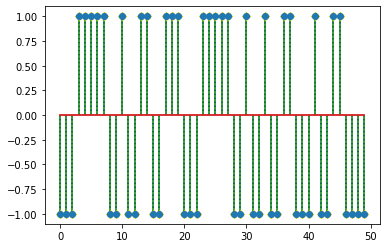

In [7]:
import matplotlib.pyplot as plt
plt.stem(Y[N:], use_line_collection=True, linefmt='b:', markerfmt='yD')
plt.stem(clsRes, use_line_collection=True, linefmt='g-')
plt.show()

原问题优化结果，和对偶问题优化结果相同

$$ 
{w,b}=arg\min_{w,b} \ \frac {1}{2}||w||^2\\
s.t \ \ y_i (w\cdot x_i +b)\geq 1
$$

In [8]:
def fun_o(wb): return 0.5*np.inner(wb[:-1], wb[:-1])


# 约束
cons_o = [{'type': 'ineq', 'fun':
           lambda wb, i=i: y[i]*(np.inner(wb[:-1], x[i])+wb[-1])-1}
          for i in range(N)]

wb0 = np.ones(x.shape[1]+1)  # 设置初始值
res = minimize(fun_o, wb0, method='SLSQP', constraints=cons_o)
print('最小值：', res.fun)
print('最优解：\n', res.x)
print('迭代终止是否成功：', res.success)
print('迭代终止原因：', res.message)

最小值： 0.5655474601674219
最优解：
 [ 0.03667851 -0.45192582  0.87634277  0.39690806 -1.38394191]
迭代终止是否成功： True
迭代终止原因： Optimization terminated successfully.


Sklearn库中的SVM的分类结果，相同

In [9]:
from sklearn import svm
clf = svm.SVC(kernel='linear', tol=1e-5)
clf.fit(x, y.reshape(N))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=1e-05, verbose=False)

In [10]:
print('支持向量为：', clf.support_)
print('W=', clf.coef_)
print('B=', clf.intercept_)
print('A=', clf.dual_coef_)  # 注意Sklearn里的ai等效于ai*yi
print('测试准确率：', clf.score(X[N:], Y[N:]))

支持向量为： [20 33 41 15]
W= [[ 0.03668428 -0.45192828  0.8763398   0.39690154]]
B= [-1.38395344]
A= [[-0.15539577 -0.32098824 -0.08916152  0.56554553]]
测试准确率： 1.0
